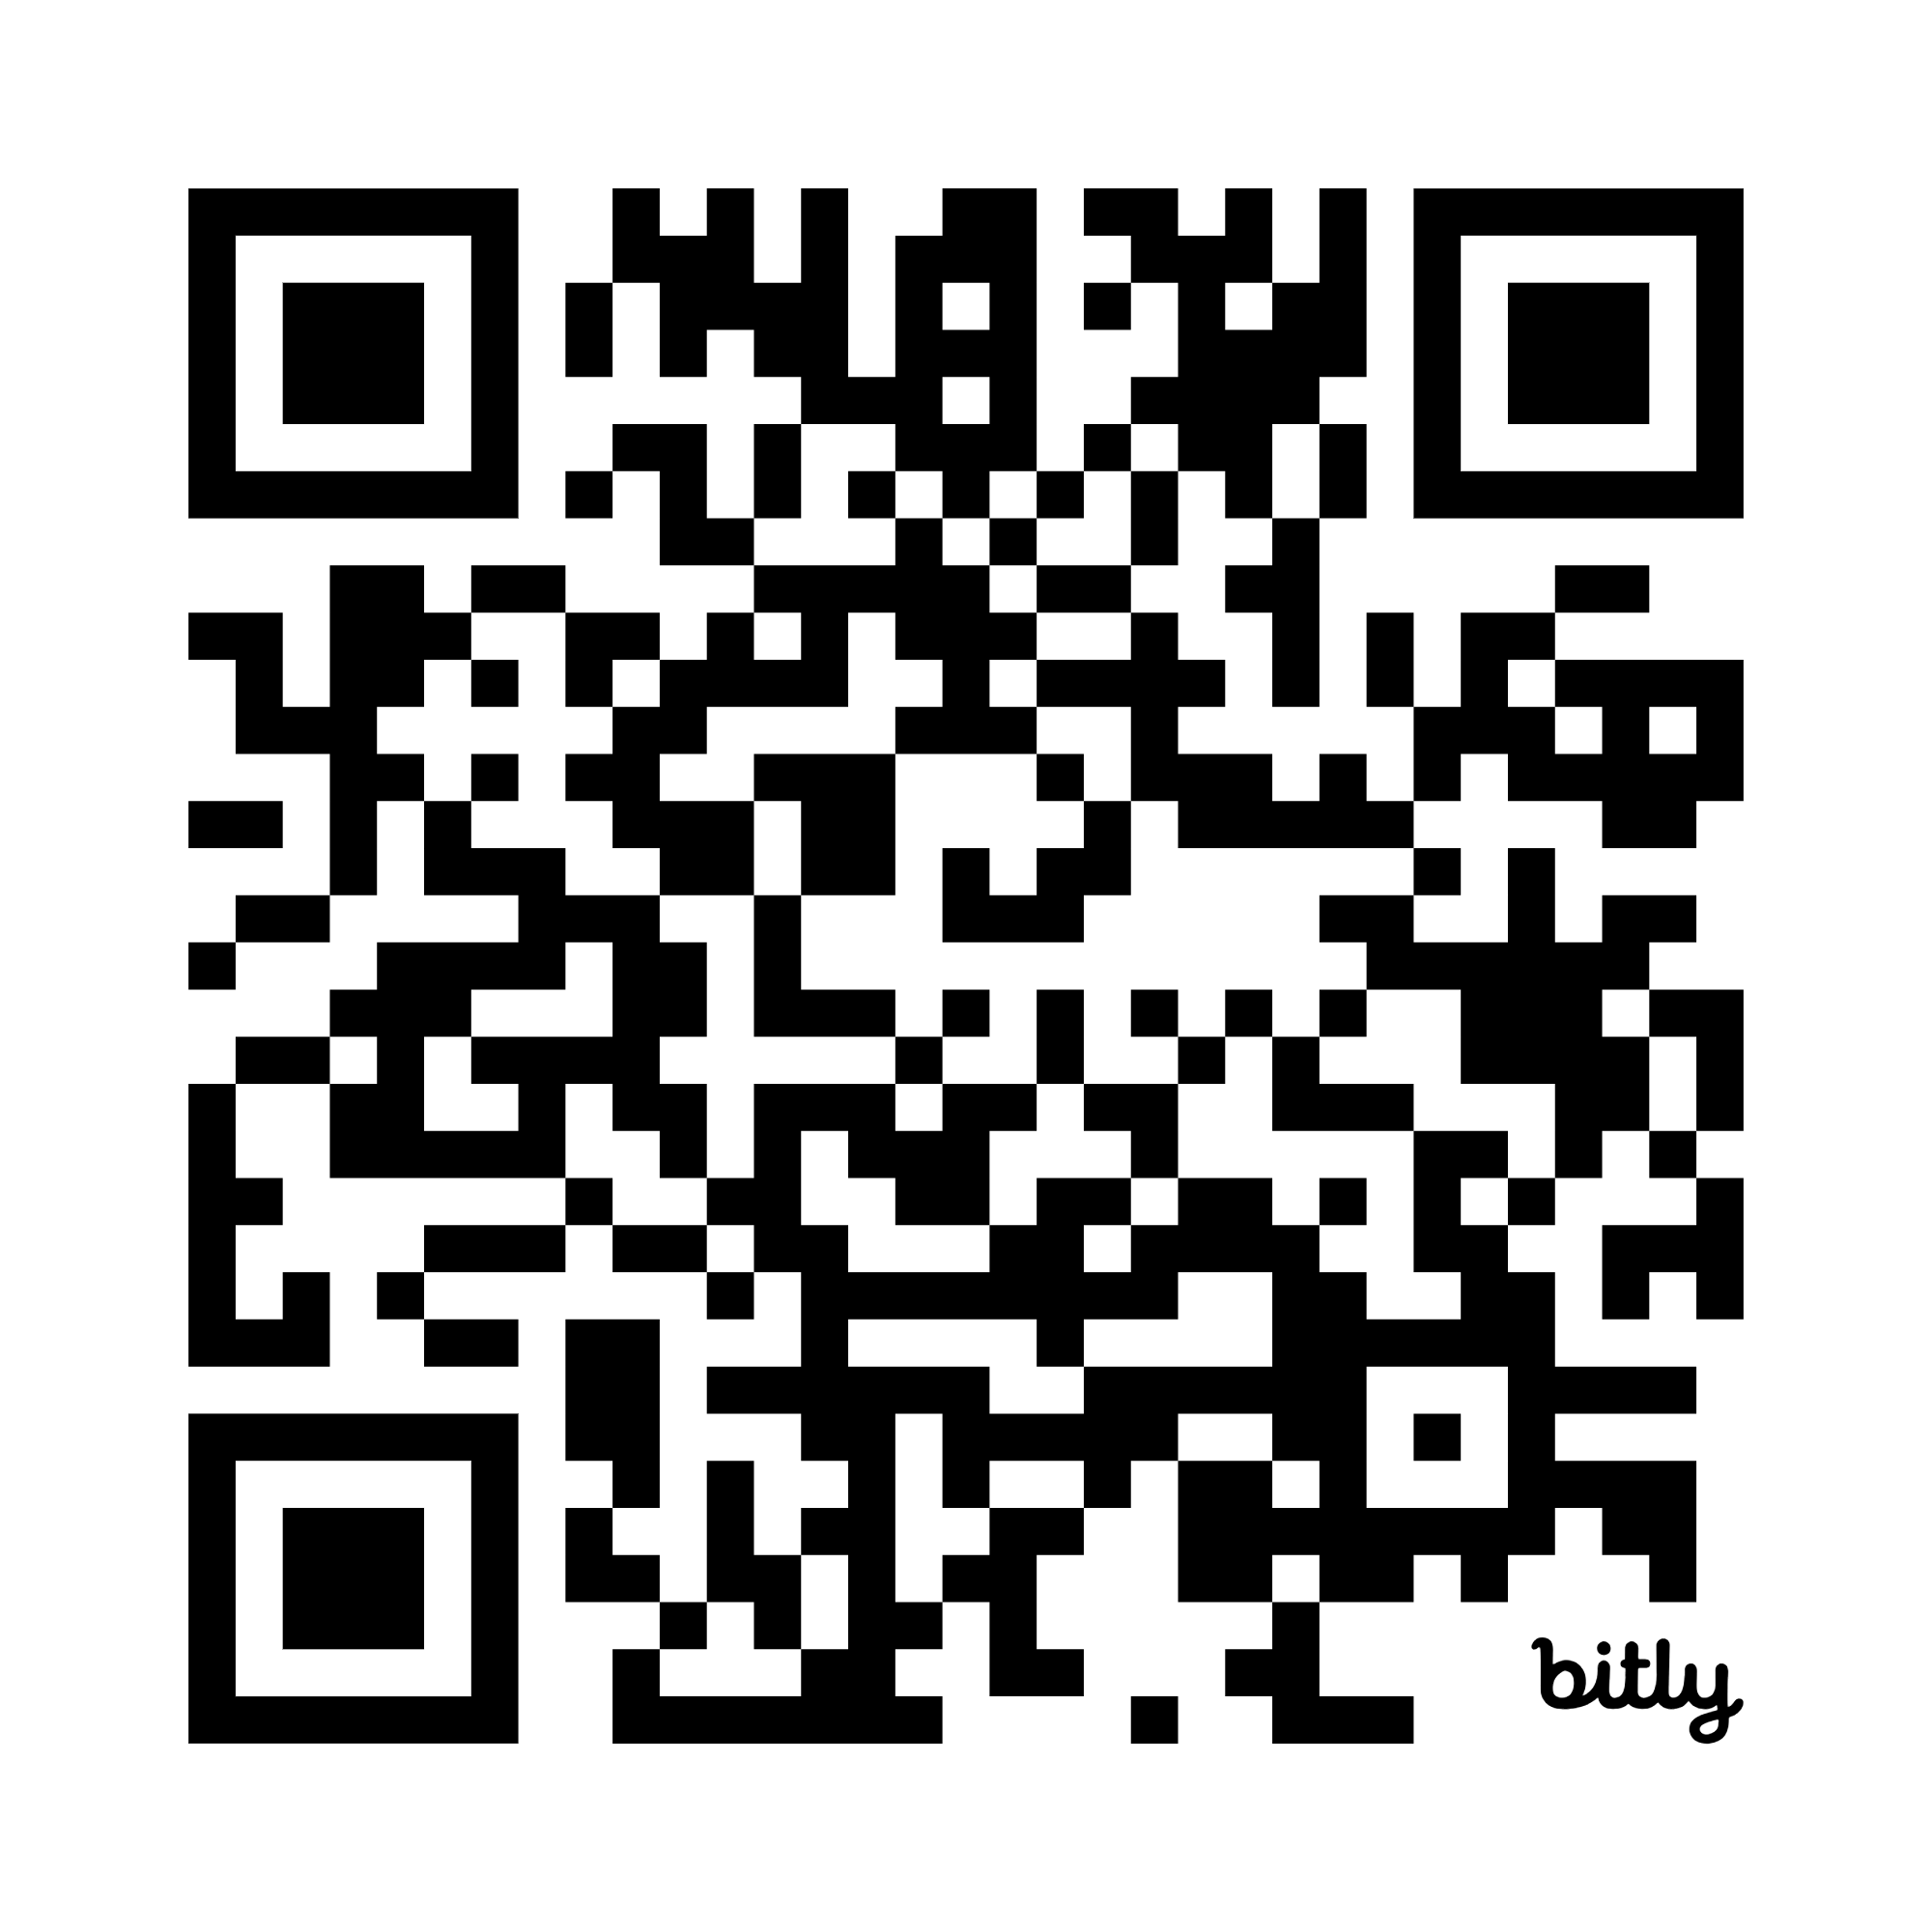

## Spotify Popularity & Audio Features Workshop
Iman Mossavat

***Workshop Goal***


Explore how Spotify track features relate (or don’t relate) to popularity. Discover which artists consistently produce hits and understand why popularity isn’t just about the audio.


https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks

## 🔑 Step 1: Get Your Kaggle API Key

To download the dataset from Kaggle into Google Colab, you need a Kaggle API key. Think of it like your personal password for Kaggle that Python can use.

Instructions

Log into Kaggle

Go to https://www.kaggle.com/

Click Sign In (top right) and enter your account details.

Go to your Account Settings

Find the API section and "Create New API Token".

Download kaggle.json

Kaggle will download a file called kaggle.json to your computer.

This file contains your username and secret key.

# Getting the data

This code sets up Google Colab so you can download datasets directly from Kaggle. First, it installs the Kaggle API (a tool for accessing Kaggle data). Then, it uploads your personal API key (kaggle.json) so Colab can authenticate with Kaggle. Finally, it uses the API to download the Spotify dataset and unzip it, making the data ready for analysis in your notebook.

In [ ]:
# Install Kaggle API and download dataset (Colab)
!pip install kaggle

from google.colab import files
files.upload()  # upload kaggle.json

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d yamaerenay/spotify-dataset-19212020-600k-tracks
!unzip spotify-dataset-19212020-600k-tracks.zip

# Load data
import pandas as pd
tracks = pd.read_csv("tracks.csv")

# Parse artist lists
import ast
tracks['artists_list'] = tracks['artists'].apply(ast.literal_eval)

# Explode so each artist gets their own row
tracks_exploded = tracks.explode('artists_list')


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks
License(s): Community Data License Agreement - Sharing - Version 1.0
spotify-dataset-19212020-600k-tracks.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  spotify-dataset-19212020-600k-tracks.zip
replace artists.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: artists.csv             
replace dict_artists.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace dict_artists.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: dict_artists.json       
  inflating: tracks.csv              


# Step 1: Explore the Dataset & Track Popularity
**Narrative**

* Spotify tracks have a popularity score from 0–100.

* Some tracks go viral due to social factors (playlists, TikTok, memes), not just features.

* Let’s see the top tracks and distribution.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import numpy as np
from sklearn.cluster import KMeans

# Load dataset
tracks = pd.read_csv("tracks.csv")
# Look at the first few rows
tracks.head()



,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


We can see what data is available for analysis in this dataset by looking at columns

In [ ]:
print(f"Data points contain these features {tracks.columns}")

Data points contain these features Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')


We can see the data set size

In [ ]:
print(f"Dataset size is {tracks.shape}")

Dataset size is (586672, 20)


                                         name  \
93802  Peaches (feat. Daniel Caesar & Giveon)   
93803                         drivers license   
93804                  Astronaut In The Ocean   
92810                         Save Your Tears   
92811                               telepatía   
93805                     Leave The Door Open   
92813                         Blinding Lights   
92814                            The Business   
92819                                 Bandido   
91866                                 Streets   

                                              artists  popularity  
93802    ['Justin Bieber', 'Daniel Caesar', 'Giveon']         100  
93803                              ['Olivia Rodrigo']          99  
93804                                 ['Masked Wolf']          98  
92810                                  ['The Weeknd']          97  
92811                                  ['Kali Uchis']          97  
93805  ['Bruno Mars', 'Anderson .Paak', 'Silk Sonic'

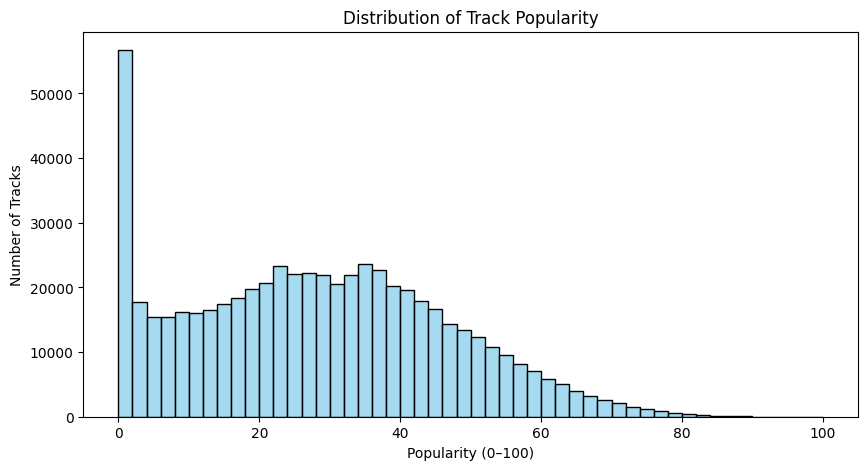

In [ ]:
tracks['artists_list'] = tracks['artists'].apply(ast.literal_eval)

# Top 10 tracks by popularity
top_tracks = tracks.sort_values('popularity', ascending=False).head(10)
print(top_tracks[['name','artists','popularity']])

# Plot distribution of popularity
plt.figure(figsize=(10,5))
sns.histplot(tracks['popularity'], bins=50, color='skyblue')
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity (0–100)")
plt.ylabel("Number of Tracks")
plt.show()


# Step 2: Understand Audio Features

***Narrative***
Each song has features (0–1) that describe its style:

* danceability → how easy it is to dance

* energy → intensity

* valence → happiness/positivity

* acousticness → acoustic vs electronic

* speechiness → spoken word vs singing

* instrumentalness → vocals or purely instrumental

* liveness → recorded live or studio

In [ ]:
# 4️⃣ Show just the columns you are asked to find
tracks[['name','artists','popularity','danceability','energy','valence']].head(10)


,name,artists,popularity,danceability,energy,valence
0,Carve,['Uli'],6,0.645,0.4450,0.1270
1,Capítulo 2.16 - Banquero Anarquista,['Fernando Pessoa'],0,0.695,0.2630,0.6550
2,Vivo para Quererte - Remasterizado,['Ignacio Corsini'],0,0.434,0.1770,0.4570
3,El Prisionero - Remasterizado,['Ignacio Corsini'],0,0.321,0.0946,0.3970
4,Lady of the Evening,['Dick Haymes'],0,0.402,0.1580,0.1960
5,Ave Maria,['Dick Haymes'],0,0.227,0.2610,0.0539
6,La Butte Rouge,['Francis Marty'],0,0.510,0.3550,0.7270
7,La Java,['Mistinguett'],0,0.563,0.1840,0.6540
8,Old Fashioned Girl,['Greg Fieler'],0,0.488,0.4750,0.5440
9,Martín Fierro - Remasterizado,['Ignacio Corsini'],0,0.548,0.0391,0.6120


We can also sort the data based on popularity and see top popular songs

In [ ]:
# Sort tracks by popularity (highest first)
tracks_sorted = tracks.sort_values('popularity', ascending=False)

# Show the top 10 most popular tracks
tracks_sorted[['name','artists','popularity','danceability','energy','valence']].head(10)


,name,artists,popularity,danceability,energy,valence
93802,Peaches (feat. Daniel Caesar & Giveon),"['Justin Bieber', 'Daniel Caesar', 'Giveon']",100,0.677,0.696,0.464
93803,drivers license,['Olivia Rodrigo'],99,0.585,0.436,0.132
93804,Astronaut In The Ocean,['Masked Wolf'],98,0.778,0.695,0.472
92810,Save Your Tears,['The Weeknd'],97,0.680,0.826,0.644
92811,telepatía,['Kali Uchis'],97,0.653,0.524,0.553
93805,Leave The Door Open,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']",96,0.586,0.616,0.719
92813,Blinding Lights,['The Weeknd'],96,0.514,0.730,0.334
92814,The Business,['Tiësto'],95,0.798,0.620,0.235
92819,Bandido,"['Myke Towers', 'Juhn']",94,0.713,0.617,0.682
91866,Streets,['Doja Cat'],94,0.749,0.463,0.190


How do different features are related to popularity

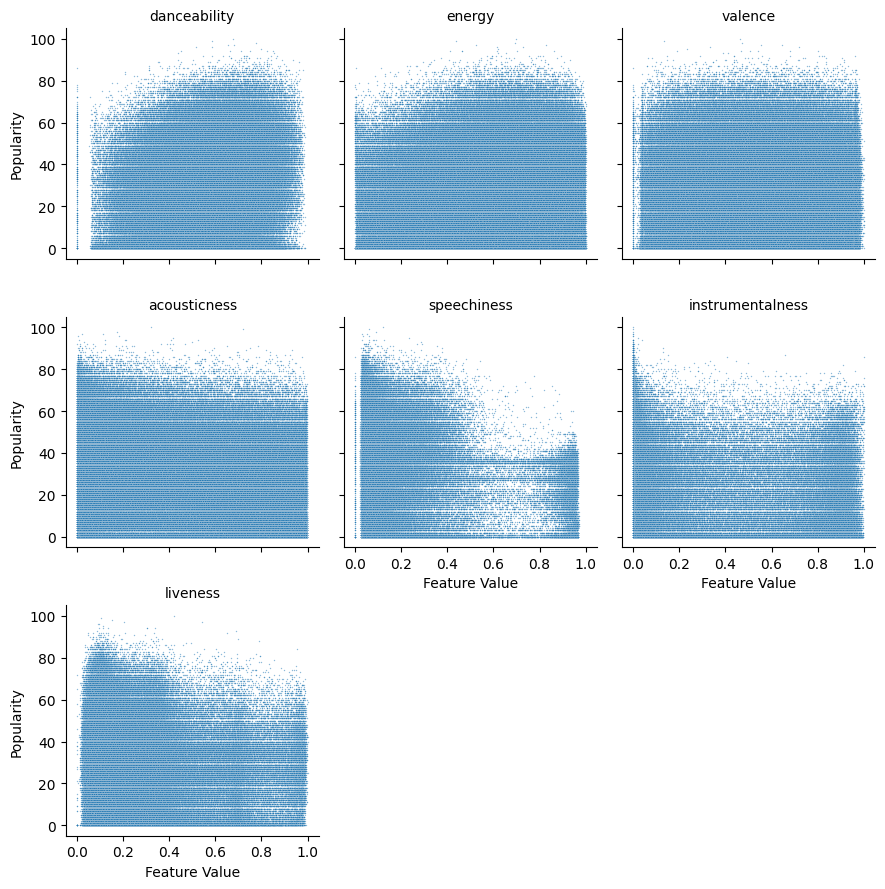

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of audio features
features = ['danceability','energy','valence','acousticness','speechiness','instrumentalness','liveness']

# Melt the DataFrame so each feature becomes a row (long-form)
tracks_long = tracks.melt(id_vars=['popularity'], value_vars=features,
                          var_name='feature', value_name='value')

# FacetGrid: feature vs popularity, 3 rows
g = sns.FacetGrid(tracks_long, col='feature', col_wrap=3, height=3)
g.map_dataframe(sns.scatterplot, x='value', y='popularity', s=1, alpha=0.5)
g.set_axis_labels("Feature Value", "Popularity")
g.set_titles("{col_name}")
plt.show()


You can see that popularity of the song is not very much dependent on its audio features. This is perhaps because popularity is about going viral, which is a network effect not necessarily a musical effect.

/tmp/ipython-input-1438453894.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_songs_features.index, y=top_songs_features.values, palette='coolwarm')


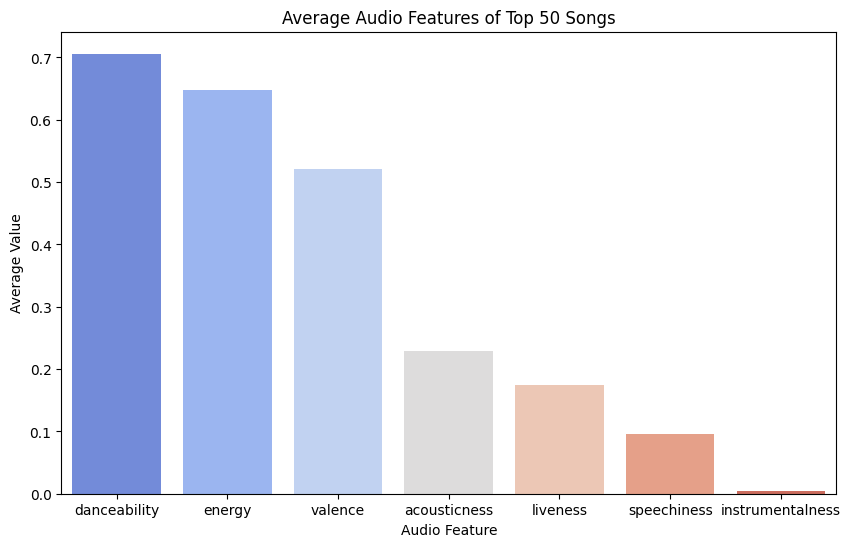

In [ ]:
audio_features = ['danceability','energy','valence','acousticness','liveness','speechiness','instrumentalness']

# Average features of top 50 songs
top_songs = tracks.sort_values('popularity', ascending=False).head(50)
top_songs_features = top_songs[audio_features].mean()

plt.figure(figsize=(10,6))
sns.barplot(x=top_songs_features.index, y=top_songs_features.values, palette='coolwarm')
plt.title("Average Audio Features of Top 50 Songs")
plt.ylabel("Average Value")
plt.xlabel("Audio Feature")
plt.show()


# Step 3: Find Popular Songs Matching a Style
***Narrative***

* We can define a “target style” (e.g., pop dance hit: high danceability, energy, valence).

* Let’s find the most popular songs closest to that style.

In [ ]:
import numpy as np

def find_popular_songs_by_features(tracks, target_features, top_n=5, min_popularity=40):
    df = tracks.dropna(subset=target_features.keys())
    df = df[df['popularity'] >= min_popularity]

    feature_cols = list(target_features.keys())
    target_values = np.array([target_features[f] for f in feature_cols])
    df['distance'] = df[feature_cols].apply(lambda row: np.linalg.norm(row.values - target_values), axis=1)

    return df.sort_values(['distance','popularity'], ascending=[True, False])[['name','artists','popularity'] + feature_cols].head(top_n)

# Example: pop dance hit
target_features = {'danceability':0.9, 'energy':0.8, 'valence':0.9}
top_songs = find_popular_songs_by_features(tracks, target_features)
print(top_songs)


                    name            artists  popularity  danceability  energy  \
158619     Hay Que Bueno         ['KD One']          68         0.901   0.808   
69065           Cachamba  ['Kinito Mendez']          51         0.903   0.802   
153654   Jag bara runkar   ['Eddie Meduza']          43         0.894   0.788   
252017  Modelong Charing       ['Blakdyak']          43         0.905   0.800   
83490       The Big Bang     ['Rock Mafia']          64         0.902   0.816   

        valence  
158619    0.898  
69065     0.908  
153654    0.905  
252017    0.916  
83490     0.894  


Now explore your own choice of style by varying these features:

```
audio_features = ['danceability','energy','valence','acousticness','liveness','speechiness','instrumentalness',  'tempo']
```



In [ ]:
target_features = {'tempo':0.9}
top_songs = find_popular_songs_by_features(tracks, target_features)
print(top_songs)

                                             name  \
89913   Clean White Noise - Loopable with no fade   
90054                        White Noise - 500 hz   
90104                        White Noise - 145 hz   
91234                            Soft Brown Noise   
115632                  Deep Sleep Recovery Noise   

                                                  artists  popularity  tempo  
89913   ['Erik Eriksson', 'White Noise Baby Sleep', 'W...          86    0.0  
90054                                        ['Granular']          78    0.0  
90104                                        ['Granular']          77    0.0  
91234                           ['High Altitude Samples']          76    0.0  
115632                ['Water Sound Natural White Noise']          75    0.0  


Try changing the target feature dictionary. If you use Tempo, you get white noise, that is indeed the fastest moving signal! People probably listen to that to get to sleep! (you can also see this in the artists name)

# Step 4: Find Artists Who Consistently Produce Hits


***Narrative***

* Some artists repeatedly produce songs in a style and popularity range.

* We can count how many songs each artist has close to our target style.

In [ ]:
# Define the “target style” we are looking for
target_features = {'instrumentalness':0.9}  # e.g., very instrumental songs

# Remove songs that are missing this feature
df = tracks.dropna(subset=target_features.keys())

# Keep only songs that are somewhat popular
df = df[df['popularity'] >= 50]  # popularity threshold

# List of features we are comparing
feature_cols = list(target_features.keys())

# Create an array of target values (for distance calculation)
target_values = np.array([target_features[f] for f in feature_cols])

# Compute Euclidean distance from each song to the target style
# Smaller distance → closer to the desired style
df['distance'] = df[feature_cols].apply(lambda row: np.linalg.norm(row.values - target_values), axis=1)

# Keep the 500 songs that are closest to the target style
df_closest = df.nsmallest(500, 'distance')

# Convert the artists column to real lists (was stored as text)
df_closest['artists_list'] = df_closest['artists'].apply(ast.literal_eval)

# Split songs with multiple artists into separate rows
df_exploded = df_closest.explode('artists_list')

# Count how many songs each artist has in this “closest to target style” group
artist_hit_counts = df_exploded.groupby('artists_list')['name'].count().sort_values(ascending=False)

# Show the top 10 artists with most songs matching the target style
print(artist_hit_counts.head(10))


artists_list
Ludovico Einaudi               11
Wolfgang Amadeus Mozart         8
Jean-Yves Thibaudet             7
Pink Floyd                      7
John Williams                   7
Frédéric Chopin                 7
Deep Sleep Music Collective     7
Daft Punk                       6
Hans Zimmer                     6
Yann Tiersen                    6
Name: name, dtype: int64


Type in any song you like (exact title, e.g., Blinding Lights).

In [ ]:
# Ask for a song name (case-insensitive)
song_name = input("Enter a song name to see its features: ").strip().lower()

# Search for matching songs
matches = tracks[tracks['name'].str.lower() == song_name]

if matches.empty:
    print("No song found with that name.")
else:
    # Show key audio features
    display_cols = ['name','artists','popularity','danceability','energy',
                    'valence','acousticness','liveness','speechiness','instrumentalness']
    print(matches[display_cols])


# Take the first match
if not matches.empty:
    target_features = matches[audio_features].iloc[0].to_dict()
    similar_songs = find_popular_songs_by_features(tracks, target_features, top_n=5, min_popularity=50)
    print("\nTop 5 similar popular songs:")
    print(similar_songs)



Enter a song name to see its features: Blackstar
             name            artists  popularity  danceability  energy  \
452672  Blackstar  ['Georgie Davis']          16         0.682    0.69   

        valence  acousticness  liveness  speechiness  instrumentalness  
452672     0.75         0.369     0.118       0.0317               0.0  

Top 5 similar popular songs:
                                name                           artists  \
237808  Por Muchas Razones Te Quiero  ['Grupo Bryndis', 'Kris Melody']   
540082           By Chance (You & I)                        ['J.R.A.']   
475797                     Ya No Más                     ["La K'onga"]   
254443                   Sedari Dulu                         ['Tompi']   
359827                  Microdancing                   ['Babasónicos']   

        popularity  danceability  energy  valence  acousticness  liveness  \
237808          50         0.697   0.715    0.778         0.362    0.1170   
540082          50         

We can use *unsupervised learning* to find clusters of songs based on their features. Here we do clustering based on a subset of features, with an algorithm called "K-means". K-means will find cluster centroids and data points are grouped based on which centroid is closest to them.  

<Figure size 1200x600 with 0 Axes>

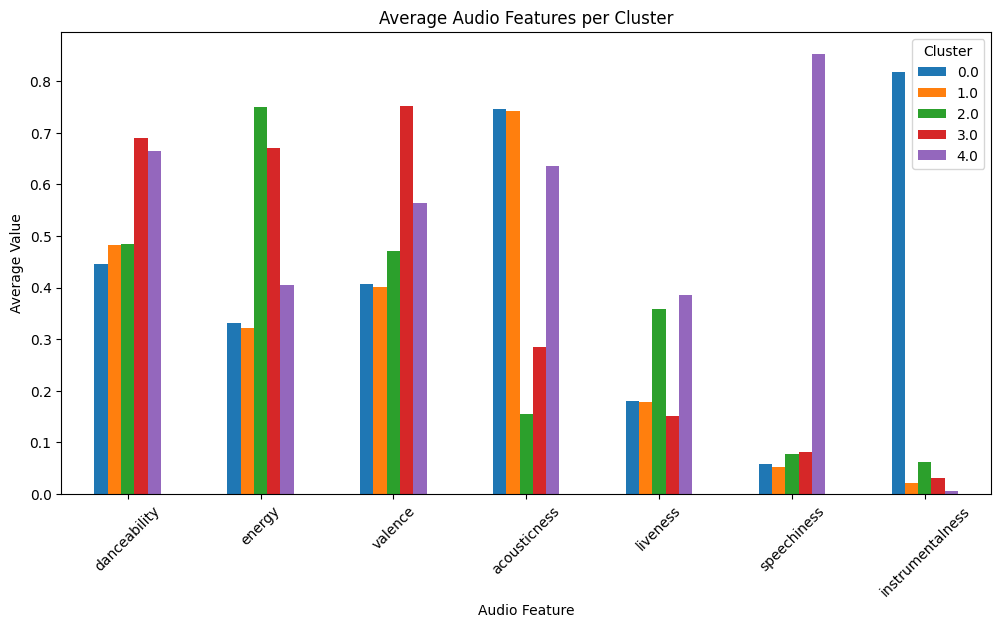

In [ ]:
# Step 0: Select features and drop missing values


features = ['danceability','energy','valence','acousticness','liveness','speechiness','instrumentalness']
X = tracks[features].dropna()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# Step 1: Run K-Means
k = 5  # number of clusters, you can change this
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Step 2: Add cluster labels to original data
tracks.loc[X.index, 'cluster'] = kmeans.labels_

# Step 3: Compute average features per cluster
cluster_features = tracks.groupby('cluster')[features].mean()

# Step 4: Plot barplot for each cluster
plt.figure(figsize=(12,6))
cluster_features.T.plot(kind='bar', figsize=(12,6))
plt.title("Average Audio Features per Cluster")
plt.xlabel("Audio Feature")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()


For K=5, If you look into the centroids above you can see that one cluster is highly instrumental (Classical), one is highly speechy (RAP?), there is also a cluster of music with high valence, danceability and energy.

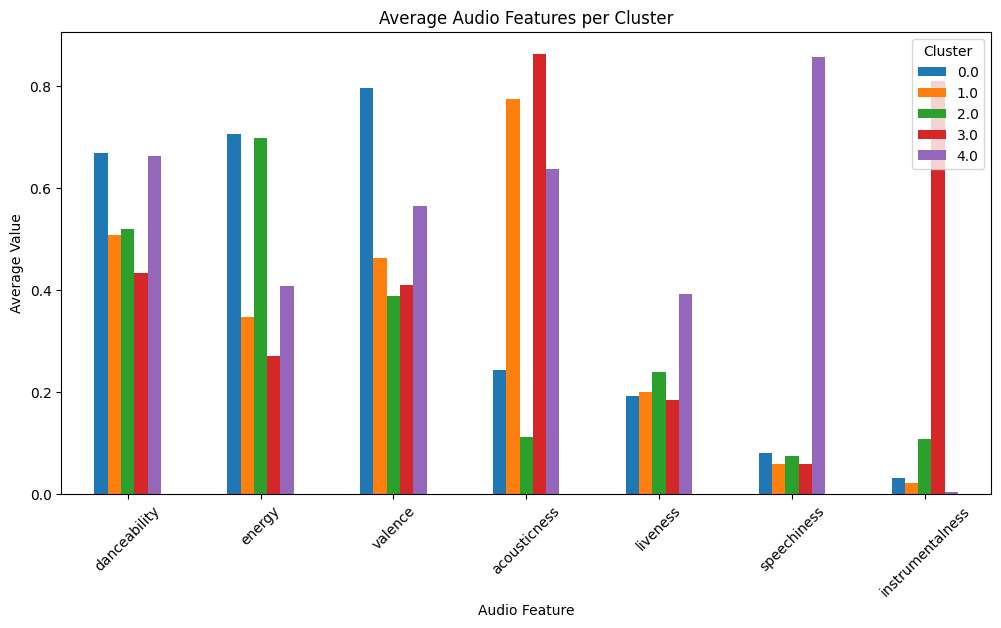


🎶 Cluster 0
Top 5 Songs:
                                              name                                                    artists  popularity
                                   Save Your Tears                                             ['The Weeknd']          97
                               Leave The Door Open             ['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']          96
                                           Bandido                                    ['Myke Towers', 'Juhn']          94
Friday (feat. Mufasa & Hypeman) - Dopamine Re-Edit ['Riton', 'Nightcrawlers', 'Mufasa & Hypeman', 'Dopamine']          94
                                              Fiel                ['Los Legendarios', 'Wisin', 'Jhay Cortez']          94

Top 5 Artists:
artists_list
J Balvin                  480
S. P. Balasubrahmanyam    418
Daddy Yankee              409
Alka Yagnik               360
Udit Narayan              347
----------------------------------------

🎶 Cluster 1
Top 5 Son

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import ast

# --- Step 0: Prepare features ---
features = ['danceability','energy','valence','acousticness','liveness','speechiness','instrumentalness']
X = tracks[features].dropna()

# --- Step 1: Run K-Means ---
k = 5  # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X)

# Add cluster labels back to dataset
tracks.loc[X.index, 'cluster'] = kmeans.labels_

# --- Step 2: Average features per cluster ---
cluster_features = tracks.groupby('cluster')[features].mean()
cluster_features.T.plot(kind='bar', figsize=(12,6))
plt.title("Average Audio Features per Cluster")
plt.xlabel("Audio Feature")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()

# --- Step 3: Most popular songs and artists in each cluster ---
# Parse artist lists if not already parsed
if 'artists_list' not in tracks.columns:
    tracks['artists_list'] = tracks['artists'].apply(ast.literal_eval)

for c in range(k):
    print(f"\n🎶 Cluster {c}")

    # Top 5 songs by popularity
    cluster_songs = tracks[tracks['cluster'] == c].sort_values('popularity', ascending=False)
    top_songs = cluster_songs[['name','artists','popularity']].head(5)
    print("Top 5 Songs:")
    print(top_songs.to_string(index=False))

    # Top 5 most common artists
    cluster_exploded = cluster_songs.explode('artists_list')
    top_artists = cluster_exploded['artists_list'].value_counts().head(5)
    print("\nTop 5 Artists:")
    print(top_artists.to_string())
    print("-"*40)


Does this clustering of artists of tracks make sense? What happens if you increase the number of clusters?